# Deep Hedging for nonlinear generalized affine processes

# Example: Call Option

Import Packages

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams
import random

Execute if it should be run on a GPU

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Write a function to generate paths of the SDE
$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t,~t\geq 0,\\
X_0 = x_0
$$
using the Euler-Maruyama Method, i.e., through
$$
X_{i+1} = X_i+(b_0+b_1 X_i) \Delta t_i +(a_0+a_1 X_i)^\gamma  \Delta W_i,~i=1,\dots,n
$$
with $\Delta t_i = T/n$ and $\Delta W_i = W_{(i+1)T/n}-W_{iT/n}$ and $X_0 = x_0$

### Plot sample paths

Too see the effects of the random parameters:

Same $\omega$ for the Brownian motion in each path.

In [17]:
# Increase the size of xticks and yticks
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

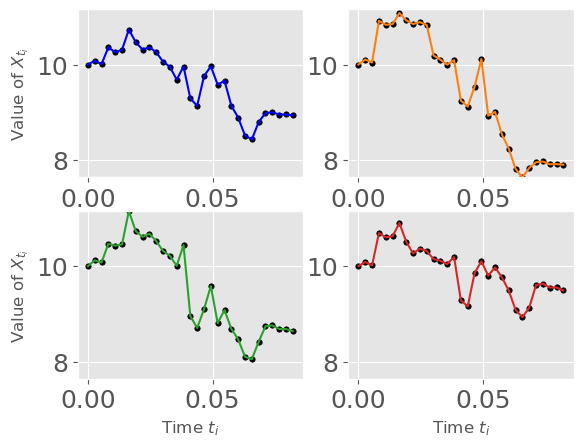

In [18]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10
# Generate x and y values
times = np.linspace(0,T,n+1)
path1 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)
path2 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)
path3 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)
path4 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)


#plot
fig, axs = plt.subplots(2, 2)
ylim_1 = min([min(path1),min(path2),min(path3),min(path4)])
ylim_2 = max([max(path1),max(path2),max(path3),max(path4)])
axs[0, 0].plot(times, path1,color="blue")
axs[0, 0].scatter(times, path1,color="black",s=15)
axs[0, 0].set(ylabel="Value of " + "$X_{t_i}$",ylim= [ylim_1,ylim_2])
axs[0, 1].plot(times, path2, 'tab:orange')
axs[0, 1].scatter(times, path2,color="black",s=15)
axs[0, 1].set(ylim= [ylim_1,ylim_2])
axs[1, 0].plot(times, path3, 'tab:green')
axs[1, 0].scatter(times, path3,color="black",s=15)
axs[1, 0].set(xlabel="Time "+"$t_i$", ylabel="Value of " + "$X_{t_i}$",ylim= [ylim_1,ylim_2])
axs[1, 1].plot(times, path4, 'tab:red')
axs[1, 1].scatter(times, path4,color="black",s=15)
axs[1, 1].set(xlabel="Time "+"$t_i$",ylim= [ylim_1,ylim_2])
plt.show()

Write a function to determine the optimal hedge based on a deep learning approach

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^{\gamma} dW_t
$$

for 

\begin{align}
a_0 &\in [0.3,0.7] \\
a_1 &\in [0.4,0.6] \\
b_0 &\in [-0.2,0.2] \\
b_1 &\in [-0.1,0.1] \\
\gamma &\in [0.5,1.5]
\end{align}

with payoff function $\Phi(X_T)=(X_T-X_0)^+$.

In [4]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-x_0)

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Iteration:10, Price of Hedge: 0.8353971838951111, Loss: 0.3602050244808197
Iteration:20, Price of Hedge: 0.8099501729011536, Loss: 0.22297737002372742
Iteration:30, Price of Hedge: 0.7908820509910583, Loss: 0.20578791201114655
Iteration:40, Price of Hedge: 0.7854304909706116, Loss: 0.22259877622127533
Iteration:50, Price of Hedge: 0.7910930514335632, Loss: 0.20277619361877441
Iteration:60, Price of Hedge: 0.7926039099693298, Loss: 0.22296206653118134
Iteration:70, Price of Hedge: 0.7956693768501282, Los

Iteration:990, Price of Hedge: 0.7915383577346802, Loss: 0.06537443399429321
Iteration:1000, Price of Hedge: 0.7914274334907532, Loss: 0.08978326618671417
Iteration:1010, Price of Hedge: 0.7937194108963013, Loss: 0.05672995746135712
Iteration:1020, Price of Hedge: 0.7911206483840942, Loss: 0.08735141158103943
Iteration:1030, Price of Hedge: 0.7960965633392334, Loss: 0.05267341062426567
Iteration:1040, Price of Hedge: 0.7896332144737244, Loss: 0.06293162703514099
Iteration:1050, Price of Hedge: 0.7893495559692383, Loss: 0.07116971909999847
Iteration:1060, Price of Hedge: 0.7915016412734985, Loss: 0.08884931355714798
Iteration:1070, Price of Hedge: 0.7853099703788757, Loss: 0.05864625796675682
Iteration:1080, Price of Hedge: 0.7829904556274414, Loss: 0.06710615754127502
Iteration:1090, Price of Hedge: 0.789996325969696, Loss: 0.05227336660027504
Iteration:1100, Price of Hedge: 0.7963019609451294, Loss: 0.04216427356004715
Iteration:1110, Price of Hedge: 0.7872136831283569, Loss: 0.050165

Iteration:2040, Price of Hedge: 0.7874841094017029, Loss: 0.06460826843976974
Iteration:2050, Price of Hedge: 0.7900500893592834, Loss: 0.047488026320934296
Iteration:2060, Price of Hedge: 0.7963383793830872, Loss: 0.05373132973909378
Iteration:2070, Price of Hedge: 0.7923469543457031, Loss: 0.048215944319963455
Iteration:2080, Price of Hedge: 0.7894815802574158, Loss: 0.0408690981566906
Iteration:2090, Price of Hedge: 0.7822854518890381, Loss: 0.045026227831840515
Iteration:2100, Price of Hedge: 0.7894228100776672, Loss: 0.046375058591365814
Iteration:2110, Price of Hedge: 0.7927050590515137, Loss: 0.049642376601696014
Iteration:2120, Price of Hedge: 0.7889381051063538, Loss: 0.04463095963001251
Iteration:2130, Price of Hedge: 0.7911496758460999, Loss: 0.05045727640390396
Iteration:2140, Price of Hedge: 0.8016142249107361, Loss: 0.05461738631129265
Iteration:2150, Price of Hedge: 0.7998902201652527, Loss: 0.05169304832816124
Iteration:2160, Price of Hedge: 0.8001980185508728, Loss: 0.

Iteration:3090, Price of Hedge: 0.7932838201522827, Loss: 0.03989313170313835
Iteration:3100, Price of Hedge: 0.8006271123886108, Loss: 0.04895811900496483
Iteration:3110, Price of Hedge: 0.7906259894371033, Loss: 0.05538931116461754
Iteration:3120, Price of Hedge: 0.7902588844299316, Loss: 0.04368632659316063
Iteration:3130, Price of Hedge: 0.7932264804840088, Loss: 0.06119988113641739
Iteration:3140, Price of Hedge: 0.8001413941383362, Loss: 0.07164262235164642
Iteration:3150, Price of Hedge: 0.7929572463035583, Loss: 0.039350319653749466
Iteration:3160, Price of Hedge: 0.7880668044090271, Loss: 0.05316794663667679
Iteration:3170, Price of Hedge: 0.7927923798561096, Loss: 0.04516587033867836
Iteration:3180, Price of Hedge: 0.7985430955886841, Loss: 0.04862816631793976
Iteration:3190, Price of Hedge: 0.7893278002738953, Loss: 0.040236227214336395
Iteration:3200, Price of Hedge: 0.7789069414138794, Loss: 0.0485142320394516
Iteration:3210, Price of Hedge: 0.7929201722145081, Loss: 0.038

Iteration:4140, Price of Hedge: 0.8010093569755554, Loss: 0.03543081879615784
Iteration:4150, Price of Hedge: 0.7901994585990906, Loss: 0.03841804713010788
Iteration:4160, Price of Hedge: 0.7934706807136536, Loss: 0.0343354269862175
Iteration:4170, Price of Hedge: 0.7949829697608948, Loss: 0.04328561946749687
Iteration:4180, Price of Hedge: 0.7900652885437012, Loss: 0.0453505665063858
Iteration:4190, Price of Hedge: 0.7970784306526184, Loss: 0.07589186728000641
Iteration:4200, Price of Hedge: 0.7808043956756592, Loss: 0.1003841757774353
Iteration:4210, Price of Hedge: 0.7917404770851135, Loss: 0.10508103668689728
Iteration:4220, Price of Hedge: 0.7942964434623718, Loss: 0.05024844408035278
Iteration:4230, Price of Hedge: 0.7892524003982544, Loss: 0.03959524631500244
Iteration:4240, Price of Hedge: 0.7940014600753784, Loss: 0.04926307499408722
Iteration:4250, Price of Hedge: 0.7848602533340454, Loss: 0.0379021130502224
Iteration:4260, Price of Hedge: 0.7864456176757812, Loss: 0.04554742

Iteration:5190, Price of Hedge: 0.7955734729766846, Loss: 0.045662328600883484
Iteration:5200, Price of Hedge: 0.7948427796363831, Loss: 0.04243823140859604
Iteration:5210, Price of Hedge: 0.7884070873260498, Loss: 0.03747585788369179
Iteration:5220, Price of Hedge: 0.7972769141197205, Loss: 0.039146218448877335
Iteration:5230, Price of Hedge: 0.7898999452590942, Loss: 0.042463451623916626
Iteration:5240, Price of Hedge: 0.7879896759986877, Loss: 0.04407902806997299
Iteration:5250, Price of Hedge: 0.7903378009796143, Loss: 0.03950667381286621
Iteration:5260, Price of Hedge: 0.7987203001976013, Loss: 0.04634222388267517
Iteration:5270, Price of Hedge: 0.7921382784843445, Loss: 0.03945065289735794
Iteration:5280, Price of Hedge: 0.7837395668029785, Loss: 0.0326523631811142
Iteration:5290, Price of Hedge: 0.7997604608535767, Loss: 0.042590733617544174
Iteration:5300, Price of Hedge: 0.7975776791572571, Loss: 0.03233947977423668
Iteration:5310, Price of Hedge: 0.7827910780906677, Loss: 0.0

Iteration:6240, Price of Hedge: 0.7959127426147461, Loss: 0.04496852308511734
Iteration:6250, Price of Hedge: 0.7991336584091187, Loss: 0.040359001606702805
Iteration:6260, Price of Hedge: 0.8026344776153564, Loss: 0.033973537385463715
Iteration:6270, Price of Hedge: 0.7957772016525269, Loss: 0.043249331414699554
Iteration:6280, Price of Hedge: 0.7947280406951904, Loss: 0.04496803134679794
Iteration:6290, Price of Hedge: 0.7964048385620117, Loss: 0.0374218113720417
Iteration:6300, Price of Hedge: 0.7867342233657837, Loss: 0.0373857319355011
Iteration:6310, Price of Hedge: 0.7840631604194641, Loss: 0.03368588536977768
Iteration:6320, Price of Hedge: 0.7967063188552856, Loss: 0.031311143189668655
Iteration:6330, Price of Hedge: 0.7864105105400085, Loss: 0.0373312309384346
Iteration:6340, Price of Hedge: 0.7936477065086365, Loss: 0.048326533287763596
Iteration:6350, Price of Hedge: 0.7825387120246887, Loss: 0.03125298395752907
Iteration:6360, Price of Hedge: 0.792706310749054, Loss: 0.047

Iteration:7290, Price of Hedge: 0.7885121703147888, Loss: 0.03551842272281647
Iteration:7300, Price of Hedge: 0.7958705425262451, Loss: 0.055553216487169266
Iteration:7310, Price of Hedge: 0.7841475605964661, Loss: 0.04462796077132225
Iteration:7320, Price of Hedge: 0.7843606472015381, Loss: 0.046248968690633774
Iteration:7330, Price of Hedge: 0.7966228723526001, Loss: 0.047980546951293945
Iteration:7340, Price of Hedge: 0.7898440361022949, Loss: 0.03451515734195709
Iteration:7350, Price of Hedge: 0.7895747423171997, Loss: 0.042594458907842636
Iteration:7360, Price of Hedge: 0.7839637994766235, Loss: 0.036218978464603424
Iteration:7370, Price of Hedge: 0.7887240052223206, Loss: 0.03585375100374222
Iteration:7380, Price of Hedge: 0.7874526381492615, Loss: 0.04026314988732338
Iteration:7390, Price of Hedge: 0.7970423102378845, Loss: 0.03969603776931763
Iteration:7400, Price of Hedge: 0.7948331236839294, Loss: 0.04441995918750763
Iteration:7410, Price of Hedge: 0.7928143739700317, Loss: 0

Iteration:8340, Price of Hedge: 0.7913639545440674, Loss: 0.04985705390572548
Iteration:8350, Price of Hedge: 0.7962334752082825, Loss: 0.03616287186741829
Iteration:8360, Price of Hedge: 0.7944893836975098, Loss: 0.036687541753053665
Iteration:8370, Price of Hedge: 0.7934117317199707, Loss: 0.03567296639084816
Iteration:8380, Price of Hedge: 0.7908715605735779, Loss: 0.03867940604686737
Iteration:8390, Price of Hedge: 0.7838189005851746, Loss: 0.03201649710536003
Iteration:8400, Price of Hedge: 0.7946172952651978, Loss: 0.0404563806951046
Iteration:8410, Price of Hedge: 0.8002102375030518, Loss: 0.037930674850940704
Iteration:8420, Price of Hedge: 0.7970927953720093, Loss: 0.05450102314352989
Iteration:8430, Price of Hedge: 0.7969009876251221, Loss: 0.03577065467834473
Iteration:8440, Price of Hedge: 0.7900411486625671, Loss: 0.03389386460185051
Iteration:8450, Price of Hedge: 0.7941078543663025, Loss: 0.041104529052972794
Iteration:8460, Price of Hedge: 0.7958087921142578, Loss: 0.03

Iteration:9390, Price of Hedge: 0.785100519657135, Loss: 0.035083577036857605
Iteration:9400, Price of Hedge: 0.7904685139656067, Loss: 0.031083209440112114
Iteration:9410, Price of Hedge: 0.7928885817527771, Loss: 0.0418638214468956
Iteration:9420, Price of Hedge: 0.7872982025146484, Loss: 0.03256804123520851
Iteration:9430, Price of Hedge: 0.7837677597999573, Loss: 0.039488065987825394
Iteration:9440, Price of Hedge: 0.7868704795837402, Loss: 0.03547140210866928
Iteration:9450, Price of Hedge: 0.8003635406494141, Loss: 0.03574978560209274
Iteration:9460, Price of Hedge: 0.791217565536499, Loss: 0.03794076293706894
Iteration:9470, Price of Hedge: 0.791592001914978, Loss: 0.03772830590605736
Iteration:9480, Price of Hedge: 0.7943964600563049, Loss: 0.042507801204919815
Iteration:9490, Price of Hedge: 0.7923420071601868, Loss: 0.04034123942255974
Iteration:9500, Price of Hedge: 0.791953980922699, Loss: 0.0339299775660038
Iteration:9510, Price of Hedge: 0.7913846373558044, Loss: 0.040175

In [5]:
#########Load the model if desired:

#hedge=keras.models.load_model('model_nonlinear_gap.h5')

Illustrate the computed hedging strategy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


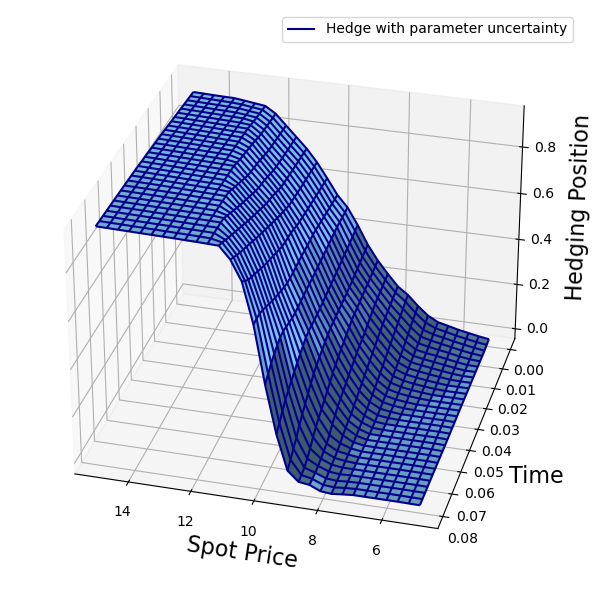

In [73]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid,color = "lightskyblue")
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge with parameter uncertainty")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_3d_gamma_uncertain.eps', format='eps')
plt.show()


Save the model

In [7]:
hedge.save("model_gamma_uncertain.h5")

# Comparison with fix-model hedge

Specify the setting and compute the hedge

In [8]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
# Specify parameters as the mean of the respective intervals.
a_0_fix = [0.5,0.5]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-x_0)

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Iteration:10, Price of Hedge: 0.6466622352600098, Loss: 0.19008366763591766
Iteration:20, Price of Hedge: 0.6254875063896179, Loss: 0.1678440272808075
Iteration:30, Price of Hedge: 0.6220526695251465, Loss: 0.20948337018489838
Iteration:40, Price of Hedge: 0.633318305015564, Loss: 0.1419578343629837
Iteration:50, Price of Hedge: 0.6373326778411865, Loss: 0.16354021430015564
Iteration:60, Price of Hedge: 0.6279939413070679, Loss: 0.14017891883850098
Iteration:70, Price of Hedge: 0.6247931122779846, Loss:

Iteration:990, Price of Hedge: 0.633987307548523, Loss: 0.019153529778122902
Iteration:1000, Price of Hedge: 0.6258339285850525, Loss: 0.02003040909767151
Iteration:1010, Price of Hedge: 0.6297556161880493, Loss: 0.01787826046347618
Iteration:1020, Price of Hedge: 0.629531979560852, Loss: 0.018182653933763504
Iteration:1030, Price of Hedge: 0.6231918334960938, Loss: 0.01898905821144581
Iteration:1040, Price of Hedge: 0.6228371262550354, Loss: 0.016780005767941475
Iteration:1050, Price of Hedge: 0.6318670511245728, Loss: 0.022052111104130745
Iteration:1060, Price of Hedge: 0.6273289918899536, Loss: 0.0251645278185606
Iteration:1070, Price of Hedge: 0.6313982009887695, Loss: 0.021681519225239754
Iteration:1080, Price of Hedge: 0.6252631545066833, Loss: 0.023033877834677696
Iteration:1090, Price of Hedge: 0.6276519894599915, Loss: 0.01827741414308548
Iteration:1100, Price of Hedge: 0.6196076273918152, Loss: 0.014081612229347229
Iteration:1110, Price of Hedge: 0.6295334696769714, Loss: 0.0

Iteration:2040, Price of Hedge: 0.6377865672111511, Loss: 0.015633080154657364
Iteration:2050, Price of Hedge: 0.6256340742111206, Loss: 0.01126599870622158
Iteration:2060, Price of Hedge: 0.63225919008255, Loss: 0.012762687169015408
Iteration:2070, Price of Hedge: 0.6326138377189636, Loss: 0.014682935550808907
Iteration:2080, Price of Hedge: 0.6219647526741028, Loss: 0.019439615309238434
Iteration:2090, Price of Hedge: 0.6320633292198181, Loss: 0.012694388628005981
Iteration:2100, Price of Hedge: 0.6320738196372986, Loss: 0.013079281896352768
Iteration:2110, Price of Hedge: 0.6288983225822449, Loss: 0.018040793016552925
Iteration:2120, Price of Hedge: 0.6366140842437744, Loss: 0.014069080352783203
Iteration:2130, Price of Hedge: 0.6242104768753052, Loss: 0.015152782201766968
Iteration:2140, Price of Hedge: 0.6326430439949036, Loss: 0.010531071573495865
Iteration:2150, Price of Hedge: 0.6300284266471863, Loss: 0.0163074042648077
Iteration:2160, Price of Hedge: 0.630340576171875, Loss: 

Iteration:3090, Price of Hedge: 0.6290385127067566, Loss: 0.01122082769870758
Iteration:3100, Price of Hedge: 0.6296579241752625, Loss: 0.011522027663886547
Iteration:3110, Price of Hedge: 0.6276554465293884, Loss: 0.012901205569505692
Iteration:3120, Price of Hedge: 0.6303033828735352, Loss: 0.010079486295580864
Iteration:3130, Price of Hedge: 0.6260438561439514, Loss: 0.012788915075361729
Iteration:3140, Price of Hedge: 0.6298261880874634, Loss: 0.018031422048807144
Iteration:3150, Price of Hedge: 0.6280152797698975, Loss: 0.01517471019178629
Iteration:3160, Price of Hedge: 0.633810818195343, Loss: 0.014150560833513737
Iteration:3170, Price of Hedge: 0.6278942823410034, Loss: 0.011393050663173199
Iteration:3180, Price of Hedge: 0.6285123825073242, Loss: 0.010313354432582855
Iteration:3190, Price of Hedge: 0.6303285360336304, Loss: 0.014221522957086563
Iteration:3200, Price of Hedge: 0.6308386325836182, Loss: 0.011146781034767628
Iteration:3210, Price of Hedge: 0.6286189556121826, Los

Iteration:4130, Price of Hedge: 0.6225323677062988, Loss: 0.009380965493619442
Iteration:4140, Price of Hedge: 0.6396484971046448, Loss: 0.010078221559524536
Iteration:4150, Price of Hedge: 0.6248523592948914, Loss: 0.01474064588546753
Iteration:4160, Price of Hedge: 0.6350290179252625, Loss: 0.014895372092723846
Iteration:4170, Price of Hedge: 0.6290698647499084, Loss: 0.014604832977056503
Iteration:4180, Price of Hedge: 0.6265672445297241, Loss: 0.014679806306958199
Iteration:4190, Price of Hedge: 0.6340271234512329, Loss: 0.013656784780323505
Iteration:4200, Price of Hedge: 0.6341834664344788, Loss: 0.011065325699746609
Iteration:4210, Price of Hedge: 0.6271249651908875, Loss: 0.010243689641356468
Iteration:4220, Price of Hedge: 0.6223370432853699, Loss: 0.011046458035707474
Iteration:4230, Price of Hedge: 0.6352984309196472, Loss: 0.00783473625779152
Iteration:4240, Price of Hedge: 0.6238605380058289, Loss: 0.009919559583067894
Iteration:4250, Price of Hedge: 0.6291367411613464, Lo

Iteration:5180, Price of Hedge: 0.6256871819496155, Loss: 0.008239028975367546
Iteration:5190, Price of Hedge: 0.6294496655464172, Loss: 0.014745252206921577
Iteration:5200, Price of Hedge: 0.6252328753471375, Loss: 0.011641515418887138
Iteration:5210, Price of Hedge: 0.6338445544242859, Loss: 0.008786724880337715
Iteration:5220, Price of Hedge: 0.626092791557312, Loss: 0.012580710463225842
Iteration:5230, Price of Hedge: 0.6295353770256042, Loss: 0.010463415645062923
Iteration:5240, Price of Hedge: 0.6325721144676208, Loss: 0.012842044234275818
Iteration:5250, Price of Hedge: 0.6298925280570984, Loss: 0.010081017389893532
Iteration:5260, Price of Hedge: 0.632766604423523, Loss: 0.007913932204246521
Iteration:5270, Price of Hedge: 0.6231525540351868, Loss: 0.011974375694990158
Iteration:5280, Price of Hedge: 0.6334264278411865, Loss: 0.010062994435429573
Iteration:5290, Price of Hedge: 0.6301193833351135, Loss: 0.00993851013481617
Iteration:5300, Price of Hedge: 0.6200140714645386, Los

Iteration:6230, Price of Hedge: 0.6283483505249023, Loss: 0.010721257887780666
Iteration:6240, Price of Hedge: 0.6249333024024963, Loss: 0.012885231524705887
Iteration:6250, Price of Hedge: 0.6358705163002014, Loss: 0.01111880037933588
Iteration:6260, Price of Hedge: 0.6248589754104614, Loss: 0.010203320533037186
Iteration:6270, Price of Hedge: 0.6222017407417297, Loss: 0.008700205944478512
Iteration:6280, Price of Hedge: 0.6315925717353821, Loss: 0.010986189357936382
Iteration:6290, Price of Hedge: 0.62884122133255, Loss: 0.010391981340944767
Iteration:6300, Price of Hedge: 0.6257683038711548, Loss: 0.012327472679316998
Iteration:6310, Price of Hedge: 0.6346561908721924, Loss: 0.01091577485203743
Iteration:6320, Price of Hedge: 0.6315416693687439, Loss: 0.01184492465108633
Iteration:6330, Price of Hedge: 0.6292129755020142, Loss: 0.009994802996516228
Iteration:6340, Price of Hedge: 0.626072108745575, Loss: 0.014641853049397469
Iteration:6350, Price of Hedge: 0.6295037865638733, Loss: 

Iteration:7280, Price of Hedge: 0.6307511925697327, Loss: 0.010010655038058758
Iteration:7290, Price of Hedge: 0.6238113641738892, Loss: 0.008680040016770363
Iteration:7300, Price of Hedge: 0.6329612135887146, Loss: 0.01176024042069912
Iteration:7310, Price of Hedge: 0.6289090514183044, Loss: 0.012328208424150944
Iteration:7320, Price of Hedge: 0.6249287128448486, Loss: 0.010114719159901142
Iteration:7330, Price of Hedge: 0.6304172277450562, Loss: 0.009851830080151558
Iteration:7340, Price of Hedge: 0.6279082894325256, Loss: 0.01021563820540905
Iteration:7350, Price of Hedge: 0.6210416555404663, Loss: 0.009131023660302162
Iteration:7360, Price of Hedge: 0.6334558725357056, Loss: 0.012235508300364017
Iteration:7370, Price of Hedge: 0.6273571252822876, Loss: 0.011235211044549942
Iteration:7380, Price of Hedge: 0.630195677280426, Loss: 0.009701383300125599
Iteration:7390, Price of Hedge: 0.6258878111839294, Loss: 0.012924518436193466
Iteration:7400, Price of Hedge: 0.6259329319000244, Los

Iteration:8330, Price of Hedge: 0.6336648464202881, Loss: 0.009822236374020576
Iteration:8340, Price of Hedge: 0.6277735233306885, Loss: 0.00998387299478054
Iteration:8350, Price of Hedge: 0.63299161195755, Loss: 0.009807863272726536
Iteration:8360, Price of Hedge: 0.6279944181442261, Loss: 0.010737902484834194
Iteration:8370, Price of Hedge: 0.6319644451141357, Loss: 0.009620299562811852
Iteration:8380, Price of Hedge: 0.6315928101539612, Loss: 0.010913738049566746
Iteration:8390, Price of Hedge: 0.6251341104507446, Loss: 0.012687738984823227
Iteration:8400, Price of Hedge: 0.6286318302154541, Loss: 0.011056898161768913
Iteration:8410, Price of Hedge: 0.6252186298370361, Loss: 0.010703351348638535
Iteration:8420, Price of Hedge: 0.6297330856323242, Loss: 0.010979892686009407
Iteration:8430, Price of Hedge: 0.6338793039321899, Loss: 0.011671354062855244
Iteration:8440, Price of Hedge: 0.6297237277030945, Loss: 0.012752603739500046
Iteration:8450, Price of Hedge: 0.6278553605079651, Los

Iteration:9380, Price of Hedge: 0.6263071298599243, Loss: 0.009960515424609184
Iteration:9390, Price of Hedge: 0.6330754160881042, Loss: 0.011361555196344852
Iteration:9400, Price of Hedge: 0.6327086091041565, Loss: 0.009624075144529343
Iteration:9410, Price of Hedge: 0.625350296497345, Loss: 0.010021003894507885
Iteration:9420, Price of Hedge: 0.6271118521690369, Loss: 0.009450389072299004
Iteration:9430, Price of Hedge: 0.629913330078125, Loss: 0.009449120610952377
Iteration:9440, Price of Hedge: 0.6274243593215942, Loss: 0.008782981894910336
Iteration:9450, Price of Hedge: 0.628507137298584, Loss: 0.011198797263205051
Iteration:9460, Price of Hedge: 0.6322385668754578, Loss: 0.00968077965080738
Iteration:9470, Price of Hedge: 0.6257749199867249, Loss: 0.01192334946244955
Iteration:9480, Price of Hedge: 0.6272459030151367, Loss: 0.011043747887015343
Iteration:9490, Price of Hedge: 0.6299813985824585, Loss: 0.013182524591684341
Iteration:9500, Price of Hedge: 0.6301983594894409, Loss:

Display the computed non-robust hedge.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


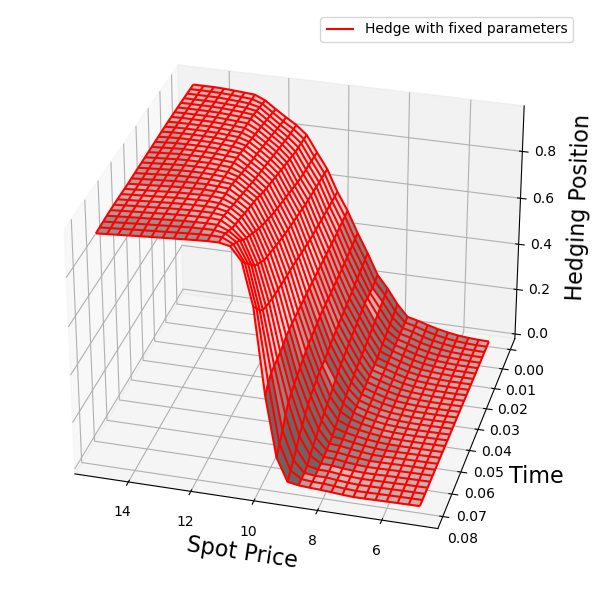

In [74]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose")
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_3d_gamma_uncertain_fix.eps', format='eps')
plt.show()

Sample Data

In [10]:
style.use('ggplot')
BATCH_SIZE = 10000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)

# The hedge with fix gamma
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

# The hedge for the model with uncertainty
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

Compare the hedges on samples under uncertainty.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\julia\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


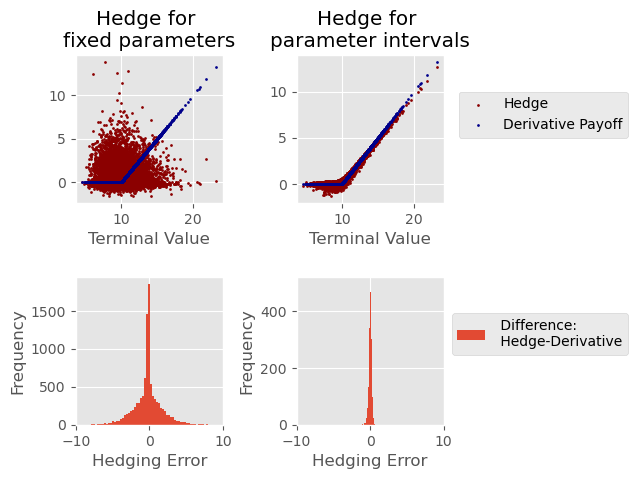

In [11]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = ((price_fix + delta_S_fix) - derivative_on_batch).numpy()
axs[1,0].hist(hedging_error_fix,100,label = " Difference:\n Hedge-Derivative")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
axs[1,1].hist(hedging_error,100)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")

fig.savefig('eps/fig_call_example_hedge_error.eps', format='eps')
fig.show()

Plot the difference of the hedging errors in a histogram

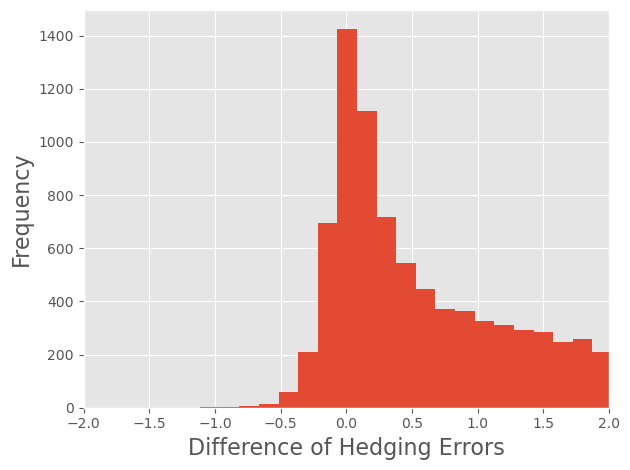

In [72]:
hedging_difference = np.abs(hedging_error_fix) - np.abs(hedging_error)
plt.hist(hedging_difference,100)
plt.xlim([-2,2])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_call_difference.eps', format='eps')
plt.show()

Statistics on the difference

In [69]:
pd.DataFrame(hedging_difference).describe()

,0
count,10000.000000
mean,1.118275
std,1.409939
min,-1.114539
25%,0.090161
50%,0.596692
75%,1.754102
max,13.829452


Statistics on Hedging Errors

Fixed Parameters:

In [55]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,10000.000000
mean,1.265065
std,1.410722
min,0.000045
25%,0.220087
50%,0.733590
75%,1.884750
max,13.854987


Robust Parameters

In [56]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,10000.000000
mean,0.146790
std,0.127345
min,0.000007
25%,0.053538
50%,0.116031
75%,0.204197
max,1.345408
